In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline 

In [2]:
cars_df = pd.read_csv("Car details.csv")
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [3]:

missing_percentage = cars_df.isnull().mean() * 100
print(missing_percentage)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64


In [4]:
# Display rows where there are missing values in any column
rows_miss_val = cars_df[cars_df.isnull().any(axis=1)]
rows_miss_val

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [5]:
cars_df = cars_df.dropna(how = 'any')

cars_df.shape

(7906, 13)

In [6]:
cars_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
#Cleaning Mileage col 
def clean_mileage(mileage_str):
    # Check for 'kmpl'
    if 'kmpl' in mileage_str:
        return float(re.sub(r' kmpl', '', mileage_str))
    # Check for 'km/kg'
    elif 'km/kg' in mileage_str: # remove this later
        return float(re.sub(r' km/kg', '', mileage_str))
    elif 'mil_kmpl' in mileage_str:
        return float(re.sub(r' mil_kmp', '', mileage_str))
    # else nan
    else:
        return None

cars_df['mileage'] = cars_df['mileage'].apply(clean_mileage)


In [8]:
#Cleaning Engine 
def clean_engine(engine_vals):
    # Check for 'CC'
    if 'CC' in engine_vals:
        return float(re.sub(r' CC', '', engine_vals))
    # else nan
    else:
        return None

cars_df['engine'] = cars_df['engine'].apply(clean_engine)

In [9]:
#Cleaning Max_power
def clean_mp(mp_vals):
    # Check for 'CC'
    if 'bhp' in mp_vals:
        return float(re.sub(r' bhp', '', mp_vals))
    # else nan
    else:
        return None

cars_df['max_power'] = cars_df['max_power'].apply(clean_mp)

In [10]:
import re

torque_nm_list = []
torque_rpm_list = []

def clean_torque_data(torque_str):
    # Extract the torque value
    torque_value = re.search(r'(\d+\.?\d*)', torque_str).group(1)
    torque_value = float(torque_value)
    
    # Determine if the unit is kgm and convert to Nm if necessary
    if 'kgm' in torque_str:
        torque_value *= 9.80665
    
    # Extract RPM
    rpm_match = re.search(r'@ (\d+[\d,]*)(?:[-\d,]*)rpm', torque_str)
    
    if not rpm_match:
        # Try to find a general numeric sequence that could be RPM
        rpm_match = re.search(r'(\d+[\d,]*)\s*(?:rpm|@)', torque_str)
    
    if rpm_match:
        # Remove commas and convert to int
        rpm_value = int(rpm_match.group(1).replace(",", ""))
    else:
        rpm_value = None
    
    return torque_value, rpm_value

for torque_str in cars_df['torque']:
    torque_nm, torque_rpm = clean_torque_data(torque_str)
    torque_nm_list.append(torque_nm)
    torque_rpm_list.append(torque_rpm)
#new cols to df
cars_df['torque_nm'] = torque_nm_list
cars_df['torque_rpm'] = torque_rpm_list


In [11]:
cars_df = cars_df.dropna(subset=['torque_rpm'])

# Display the cleaned DataFrame
print(cars_df[['torque', 'torque_nm', 'torque_rpm']])

                         torque   torque_nm  torque_rpm
0                190Nm@ 2000rpm  190.000000      2000.0
1           250Nm@ 1500-2500rpm  250.000000      1500.0
2         12.7@ 2,700(kgm@ rpm)  124.544455         7.0
3      22.4 kgm at 1750-2750rpm  219.668960      2750.0
4         11.5@ 4,500(kgm@ rpm)  112.776475         5.0
...                         ...         ...         ...
8123           113.7Nm@ 4000rpm  113.700000      4000.0
8124  24@ 1,900-2,750(kgm@ rpm)  235.359600        24.0
8125             190Nm@ 2000rpm  190.000000      2000.0
8126        140Nm@ 1800-3000rpm  140.000000      1800.0
8127        140Nm@ 1800-3000rpm  140.000000      1800.0

[7844 rows x 3 columns]


In [12]:
cars_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_nm,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250.000000,1500.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,124.544455,7.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,219.668960,2750.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,112.776475,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.700000,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,235.359600,24.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0,190.000000,2000.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,140.000000,1800.0


In [13]:
cars_new = cars_df.drop(['torque'], axis = 1)

In [14]:
cars_new.describe()
# this shows we may have to normalize these cols (year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm) 
# due to the range of data


,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
count,7844.000000,7.844000e+03,7.844000e+03,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000
mean,2013.978837,6.372185e+05,6.920086e+04,19.434522,1455.870984,91.158076,5.418154,180.003531,2579.449516
std,3.854032,7.877406e+05,5.674937e+04,4.045713,504.477213,35.258371,0.959757,115.790945,1243.465584
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,47.071920,1.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,111.795810,1750.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,5.000000,170.000000,2000.000000
75%,2017.000000,6.800000e+05,9.500000e+04,22.320000,1582.000000,102.000000,5.000000,205.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,3726.527000,5000.000000


In [15]:
# Handling Categorical data (Fuel)
fuel_mapping = {
    'Petrol': 0,
    'Diesel': 1,
}

cars_new['fuel'] = cars_new['fuel'].map(fuel_mapping)

# fuel types that are not 'Petrol' or 'Diesel', assign -1
cars_new['fuel'] = cars_new['fuel'].fillna(-1)


In [16]:
# Handling Categorical data (selling_type)
seller_type_mapping = {
    'Individual': 0,
    'Dealer': 1,
    'Trustmark Dealer': 2
}
cars_new['seller_type'] = cars_new['seller_type'].map(seller_type_mapping)


In [17]:
#Handling Categorical data (transmission)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cars_new['transmission'] = label_encoder.fit_transform(cars_new['transmission'])

# Encoding 1 manual is and 0 is automatic


In [18]:
# # Handling Categorical data (Owner)
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}

# Apply the mapping to the 'owner' column in the car_new DataFrame
cars_new['owner'] = cars_new['owner'].map(owner_mapping)

In [19]:
cars_new

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,1.0,0,1,1,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1.0,0,1,2,21.14,1498.0,103.52,5.0,250.000000,1500.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0.0,0,1,3,17.70,1497.0,78.00,5.0,124.544455,7.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1.0,0,1,1,23.00,1396.0,90.00,5.0,219.668960,2750.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0.0,0,1,1,16.10,1298.0,88.20,5.0,112.776475,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,0.0,0,1,1,18.50,1197.0,82.85,5.0,113.700000,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1.0,0,1,4,16.80,1493.0,110.00,5.0,235.359600,24.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1.0,0,1,1,19.30,1248.0,73.90,5.0,190.000000,2000.0
8126,Tata Indigo CR4,2013,290000,25000,1.0,0,1,1,23.57,1396.0,70.00,5.0,140.000000,1800.0


In [20]:
print(cars_new['fuel'].value_counts(),"\n")
print(cars_new['seller_type'].value_counts(),"\n")
print(cars_new['transmission'].value_counts(),"\n")
print(cars_new['owner'].value_counts(),"\n")


 1.0    4241
 0.0    3516
-1.0      87
Name: fuel, dtype: int64 

0    6504
1    1104
2     236
Name: seller_type, dtype: int64 

1    6838
0    1006
Name: transmission, dtype: int64 

1    5175
2    2002
3     503
4     159
0       5
Name: owner, dtype: int64 



#### Correlation Analysis 

/var/folders/p0/5fj69jjs0fnf6prskk1y53yc0000gn/T/ipykernel_38557/2627893031.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_new.corr(),annot=True,cmap='viridis',linewidths=.5)
/var/folders/p0/5fj69jjs0fnf6prskk1y53yc0000gn/T/ipykernel_38557/2627893031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_new.corr()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
year,1.000000,0.405399,-0.423711,0.037402,0.233865,-0.238758,-0.507100,0.331447,0.014724,0.215791,-0.005777,0.080935,0.164537
selling_price,0.405399,1.000000,-0.214501,0.199231,0.338710,-0.574597,-0.235701,-0.124486,0.456432,0.740345,0.051218,0.462860,-0.129666
km_driven,-0.423711,-0.214501,1.000000,0.260289,-0.193655,0.195046,0.283234,-0.173453,0.209371,-0.027982,0.225891,0.087584,-0.292816
fuel,0.037402,0.199231,0.260289,1.000000,-0.041475,0.026172,0.018061,0.046473,0.500071,0.305943,0.352709,0.522004,-0.745389
seller_type,0.233865,0.338710,-0.193655,-0.041475,1.000000,-0.366718,-0.207339,-0.024504,0.122335,0.247443,-0.076063,0.087641,0.100545
transmission,-0.238758,-0.574597,0.195046,0.026172,-0.366718,1.000000,0.147130,0.177902,-0.277343,-0.527760,0.068994,-0.281155,-0.067266
owner,-0.507100,-0.235701,0.283234,0.018061,-0.207339,0.147130,1.000000,-0.172969,0.006897,-0.110032,0.028016,-0.025760,-0.128459
mileage,0.331447,-0.124486,-0.173453,0.046473,-0.024504,0.177902,-0.172969,1.000000,-0.576441,-0.376247,-0.453391,-0.250361,0.097322
engine,0.014724,0.456432,0.209371,0.500071,0.122335,-0.277343,0.006897,-0.576441,1.000000,0.706539,0.615774,0.596046,-0.447833
max_power,0.215791,0.740345,-0.027982,0.305943,0.247443,-0.527760,-0.110032,-0.376247,0.706539,1.000000,0.201465,0.655868,-0.211775


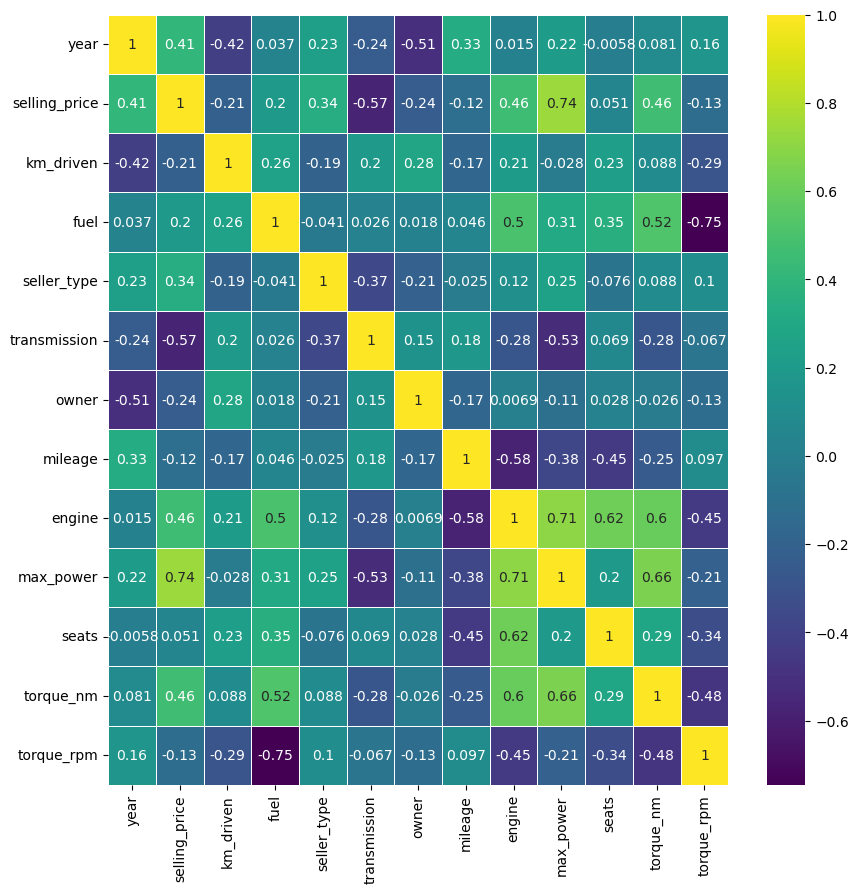

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(cars_new.corr(),annot=True,cmap='viridis',linewidths=.5)

cars_new.corr()

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = cars_new.select_dtypes(include=['float64', 'int64'])

# Add a constant (intercept) column to the dataset
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data[vif_data['Feature'] != 'const']

print(vif_data) # Dataset doesn't have severe multicolinearity 

          Feature       VIF
1            year  2.179468
2   selling_price  2.991716
3       km_driven  1.436369
4            fuel  3.272005
5     seller_type  1.242397
6    transmission  1.749648
7           owner  1.372876
8         mileage  2.656740
9          engine  5.261089
10      max_power  4.866703
11          seats  2.233023
12      torque_nm  2.318521
13     torque_rpm  2.677334


### Model deveoplement 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'name' column
cars_new = cars_new.drop('name', axis=1)

# Define the target variable and features
X = cars_new.drop('selling_price', axis=1)
y = cars_new['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # train data = 75% and test data = 25%

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae}
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}, MAE = {metrics['MAE']}")


[12:27:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Linear Regression: MSE = 216070856839.9572, R2 = 0.6591227068582981, MAE = 277478.52827599243
Random Forest: MSE = 22683600899.521526, R2 = 0.964213940804322, MAE = 71572.0799344557
XGBoost: MSE = 31033567688.44879, R2 = 0.9510408639907837, MAE = 94315.43467937277
SVR: MSE = 673002040636.9971, R2 = -0.061740196000171776, MAE = 377515.2259558324
Gradient Boosting: MSE = 29956466855.8187, R2 = 0.9527401358829979, MAE = 91427.72206590319
Lasso: MSE = 216070731842.2444, R2 = 0.6591229040569515, MAE = 277477.47598488926
Ridge: MSE = 216062992800.167, R2 = 0.659135113309756, MAE = 277445.1868458759
KNN: MSE = 53722031045.31471, R2 = 0.9152471518249894, MAE = 102592.02549719531


The Random Forest Regressor is the best-performing model based on all three metrics (MSE, R2, and MAE)

In [25]:
# Calculate training accuracy (R2)
rf_train_predictions = models['Random Forest'].predict(X_train_scaled)
rf_train_r2 = r2_score(y_train, rf_train_predictions)

# Calculate testing accuracy (R2)
rf_test_predictions = models['Random Forest'].predict(X_test_scaled)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

# Print the training and testing accuracy
print(f"Random Forest Regressor Training R2: {rf_train_r2}")
print(f"Random Forest Regressor Testing R2: {rf_test_r2}")


Random Forest Regressor Training R2: 0.9952976115968496
Random Forest Regressor Testing R2: 0.964213940804322


#### Saving Model

In [26]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(models['Random Forest'], file)

In [33]:
import pickle
import numpy as np

# Load your trained model
model = pickle.load(open('random_forest_model.pkl', 'rb'))

# Define mappings for categorical variables
fuel_mapping = {
    'Petrol': 0,
    'Diesel': 1,
    'CNG': -1,          
    'LPG': -1,          
    'Electric': -1      
}

seller_type_mapping = {
    'Individual': 0,
    'Dealer': 1,
    'Trustmark Dealer': 2
}

transmission_mapping = {
    'Manual': 1,
    'Automatic': 0
}

owner_mapping = {
    'Test Drive Car': 0,
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}

# Example input values
year = 2021
km_driven = 80000
fuel = 'Electric'  # This can be 'Petrol', 'Diesel', 'CNG', 'LPG', or 'Electric'
seller_type = 'Individual'
transmission = 'Automatic'
owner = 'First Owner'
mileage = 18.5
engine = 4500
max_power = 140
seats = 5

# Preprocessing logic to handle different fuel types
if fuel == 'Electric':
    torque_nm = 0
    torque_rpm = 0
else:
    torque_nm = 250  # Example value, should be extracted from the form or input
    torque_rpm = 4000  # Example value, should be extracted from the form or input

# Convert categorical variables using mappings
fuel_mapped = fuel_mapping[fuel]
seller_type_mapped = seller_type_mapping[seller_type]
transmission_mapped = transmission_mapping[transmission]
owner_mapped = owner_mapping[owner]

# Create the test input array
test_input = [
    year, km_driven, fuel_mapped, seller_type_mapped, 
    transmission_mapped, owner_mapped, mileage, engine, 
    max_power, seats, torque_nm, torque_rpm
]

test_input_array = np.array([test_input])

predicted_price = model.predict(test_input_array)

print(f"The predicted selling price of the car is RS.{predicted_price[0]:.2f}")


The predicted selling price of the car is RS.4629000.00
